![Autoencoder](keras_denoising_autoencoder_header.png "Autoencoder")

"Autoencoding" is a data compression algorithm where the compression and decompression functions are
<ol>
    <li>data-specific</li>
    <li>lossy</li>
    <li>learned automatically from examples rather than engineered by a human</li>
</ol>
Additionally, in almost all contexts where the term "autoencoder" is used, the compression and decompression functions are implemented with <b>neural networks</b>.

Autoencoder consists of two parts: an encoder function $h=f(x)$ and a decoder $r = g(h)$. <br>
Because the model is forced to prioritize which aspects of the input should be copied, it often learns useful properties of the data.<br>
It is oftentimes called <i>self-supervised learning</i> algorithm.

The learning process is described simply as minimizing a loss function
\begin{equation*}
L\left(x, \,g\left(f\left(x\right)\right)\right)
\end{equation*}
When the decoder is linear and $L$ is the mean squared error, an undercomplete autoencoder learns to span the same subspace as PCA.

# Simple autoencoder

## Import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Import dataset: MNIST fashion

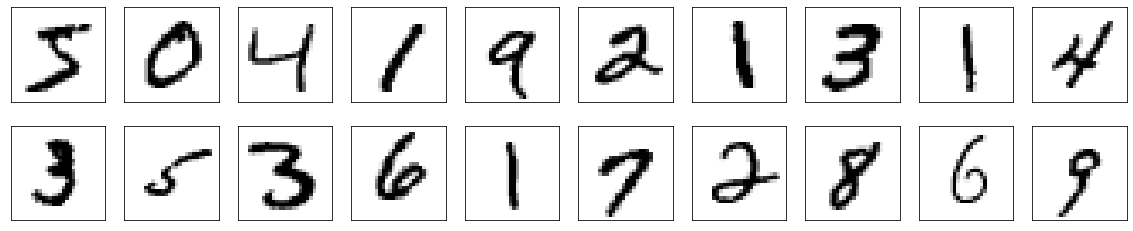

In [2]:
data = keras.datasets.mnist
(X_train, _), (X_test, _) = data.load_data()

plt.figure(figsize=(20, 4))
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xticks([]); plt.yticks([])
    plt.grid(False)
plt.show()

## Preprocess the dataset

In [3]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

## Create model

In [4]:
# Create layers
inputLayer = keras.Input(shape=(784,))
encodedLayer = keras.layers.Dense(32, activation='relu')(inputLayer)
decodedLayer = keras.layers.Dense(784, activation='sigmoid')(encodedLayer)

# Create models
# 1. encoder: a neural network from the input data to the latent space
# 2. decoder: a neural network from the latent space to the reconstructed output
# 3. model: a fully connected autoencoder
model = keras.Model(inputLayer, decodedLayer)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

encoder = keras.Model(inputLayer, encodedLayer)
encoder.summary(); print('\n')

encoded_input = keras.Input(shape=(32,)) # An input to the decoder model
decoded_output = model.layers[-1](encoded_input) # An output to the decoder model
decoder = keras.Model(encoded_input, decoded_output)
decoder.summary(); print('\n')

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainab

## Train model

In [5]:
model.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2727 - val_loss: 0.1857
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1679 - val_loss: 0.1515
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1430 - val_loss: 0.1329
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1279 - val_loss: 0.1207
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1179 - val_loss: 0.1128
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1112 - val_loss: 0.1071
Epoch 7/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1063 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1026 - val_loss: 0.0997
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0998 - val_loss: 0.0974
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0979 - val_loss: 0.0958

## Visualize the encoded/decoded images

In [6]:
encoded_images = encoder.predict(X_test)
decoded_images = decoder.predict(encoded_images)

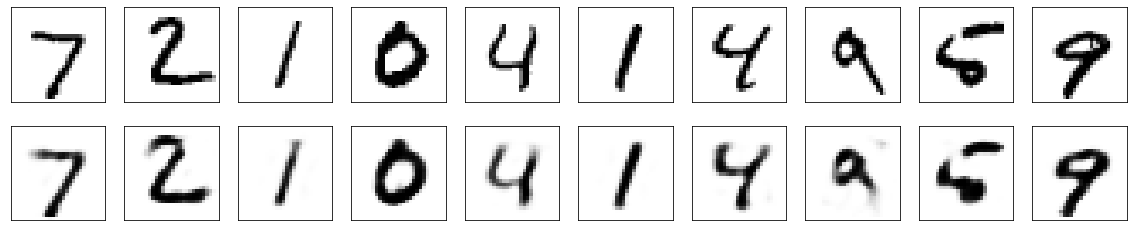

In [7]:
plt.figure(figsize=(20, 4))
for i in range(10):
    # Display original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xticks([]); plt.yticks([])

    # Display reconstruction
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xticks([]); plt.yticks([])
plt.show()

# Deep Autoencoder

## Import and preprocess dataset

In [8]:
data = keras.datasets.mnist
(X_train, _), (X_test, _) = data.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

## Create model

In [9]:
inputLayer = keras.Input(shape=(28*28,))

encodedLayer = keras.layers.Dense(128, activation='relu')(inputLayer)
encodedLayer = keras.layers.Dense(64, activation='relu')(encodedLayer)
encodedLayer = keras.layers.Dense(32, activation='relu')(encodedLayer)

decodedLayer = keras.layers.Dense(64, activation='relu')(encodedLayer)
decodedLayer = keras.layers.Dense(128, activation='relu')(decodedLayer)
decodedLayer = keras.layers.Dense(28*28, activation='sigmoid')(decodedLayer)

model = keras.Model(inputLayer, decodedLayer)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 784)              

In [10]:
model.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2497 - val_loss: 0.1692
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1517 - val_loss: 0.1379
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1311 - val_loss: 0.1242
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1214 - val_loss: 0.1166
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1154 - val_loss: 0.1114
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1110 - val_loss: 0.1081
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1080 - val_loss: 0.1057
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1057 - val_loss: 0.1031
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1037 - val_loss: 0.1024
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1020 - val_loss: 0.09

## Visualize the encoded/decoded images

In [11]:
encoded_images = encoder.predict(X_test)
decoded_images = decoder.predict(encoded_images)

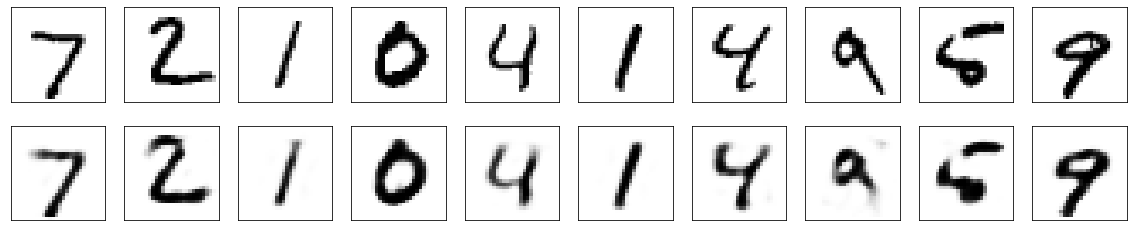

In [12]:
plt.figure(figsize=(20, 4))
for i in range(10):
    # Display original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xticks([]); plt.yticks([])

    # Display reconstruction
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xticks([]); plt.yticks([])
plt.show()

# Convolutional autoencoder

## Import and preprocess dataset

In [19]:
data = keras.datasets.mnist
(X_train, _), (X_test, _) = data.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))

## Create model

In [23]:
model = keras.Sequential()
model.add(keras.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2), padding='same'))

model.add(keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.UpSampling2D((2, 2)))
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.UpSampling2D((2, 2)))
model.add(keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_12 (UpSampling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 16)       

In [24]:
model.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 44s 188ms/step - loss: 0.2233 - val_loss: 0.1096
Epoch 2/50
235/235 [==============================] - 49s 207ms/step - loss: 0.1001 - val_loss: 0.0922
Epoch 3/50
235/235 [==============================] - 46s 196ms/step - loss: 0.0901 - val_loss: 0.0869
Epoch 4/50
235/235 [==============================] - 46s 195ms/step - loss: 0.0863 - val_loss: 0.0840
Epoch 5/50
235/235 [==============================] - 50s 211ms/step - loss: 0.0840 - val_loss: 0.0821
Epoch 6/50
235/235 [==============================] - 49s 209ms/step - loss: 0.0823 - val_loss: 0.0807
Epoch 7/50
235/235 [==============================] - 49s 208ms/step - loss: 0.0809 - val_loss: 0.0794
Epoch 8/50
235/235 [==============================] - 49s 209ms/step - loss: 0.0798 - val_loss: 0.0785
Epoch 9/50
235/235 [==============================] - 52s 220ms/step - loss: 0.0790 - val_loss: 0.0777
Epoch 10/50
235/235 [==============================] - 54s 228ms/step - l

## Visualize the encoded/decoded images

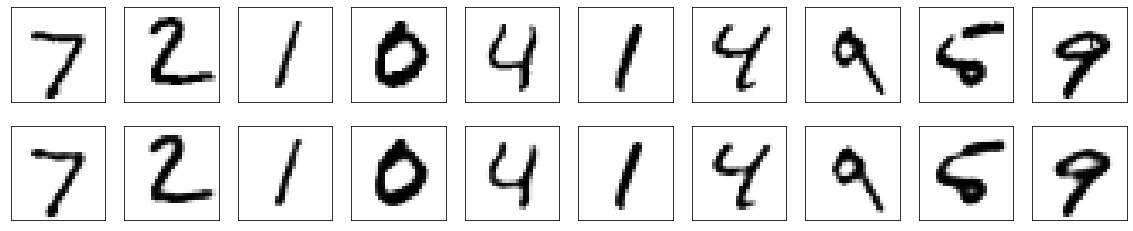

In [26]:
decoded_images = model.predict(X_test)

plt.figure(figsize=(20, 4))
for i in range(10):
    # Display original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xticks([]); plt.yticks([])

    # Display reconstruction
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xticks([]); plt.yticks([])
plt.show()

# Custom dataset

In [ ]:
path = '../dataset/anime_faces'
